In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\conda\envs\tf2.x\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\conda\envs\tf2.x\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\conda\envs\tf2.x\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 创建一个颜色调画板
pal = sns.color_palette()

In [3]:
print('# File sizes')
for f in os.listdir('E:/datasets/quora-question-pairs'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('E:/datasets/quora-question-pairs/' + f) / 1000000, 2)) + 'MB')

# File sizes
test.csv                      314.02MB
train.csv                     63.4MB


In [4]:
df_train = pd.read_csv('E:/datasets/quora-question-pairs/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
# 设置字体为 'SimHei' 来支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

训练集中问题对的总数: 404290
重复对的百分比: 36.92%
训练数据中问题的总数: 537933
多次出现的问题数量: 111780


C:\Users\Jacky\AppData\Local\Temp\ipykernel_2504\3696691587.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, '问题数量')

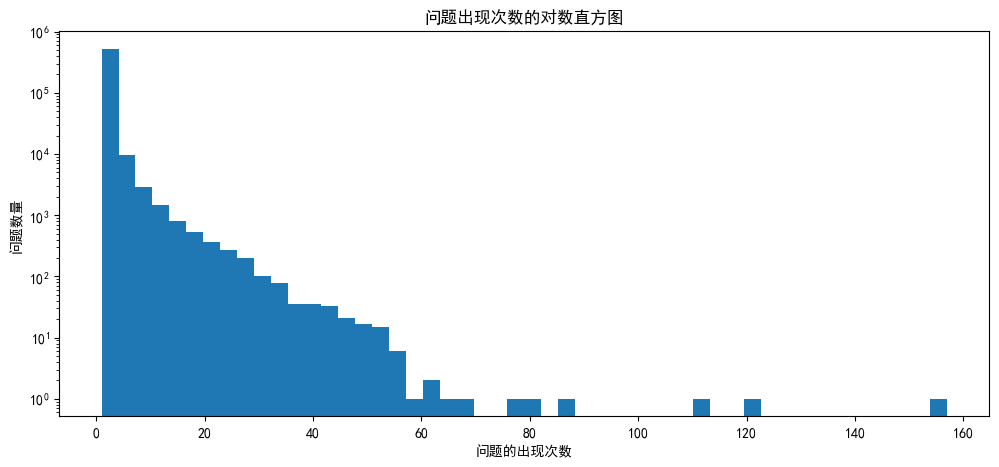

In [6]:
# 打印训练集中问题对的总数
print('训练集中问题对的总数: {}'.format(len(df_train)))
# 打印重复问题对的百分比
print('重复对的百分比: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
# 创建一个包含所有问题ID的序列
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
# 打印训练数据中独特问题的总数
print('训练数据中问题的总数: {}'.format(len(np.unique(qids))))
# 打印多次出现的问题数量
print('多次出现的问题数量: {}'.format(np.sum(qids.value_counts() > 1)))

# 创建一个图表来可视化问题出现次数的对数直方图
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('问题出现次数的对数直方图')
plt.xlabel('问题的出现次数')
plt.ylabel('问题数量')

In [7]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
print('预测分数:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

df_test = pd.read_csv('E:/datasets/quora-question-pairs/test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

预测分数: 0.6585273839844354


,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198


In [8]:
df_test = pd.read_csv('E:/datasets/quora-question-pairs/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [9]:
# 打印测试集中问题对的总数
print('测试集中问题对的总数: {}'.format(len(df_test)))

测试集中问题对的总数: 2345796


训练集平均字符数 59.82 训练集标准差 31.96 测试集平均字符数 60.07 测试集标准差 31.62 训练集最大字符数 1169.00 测试集最大字符数 1176.00


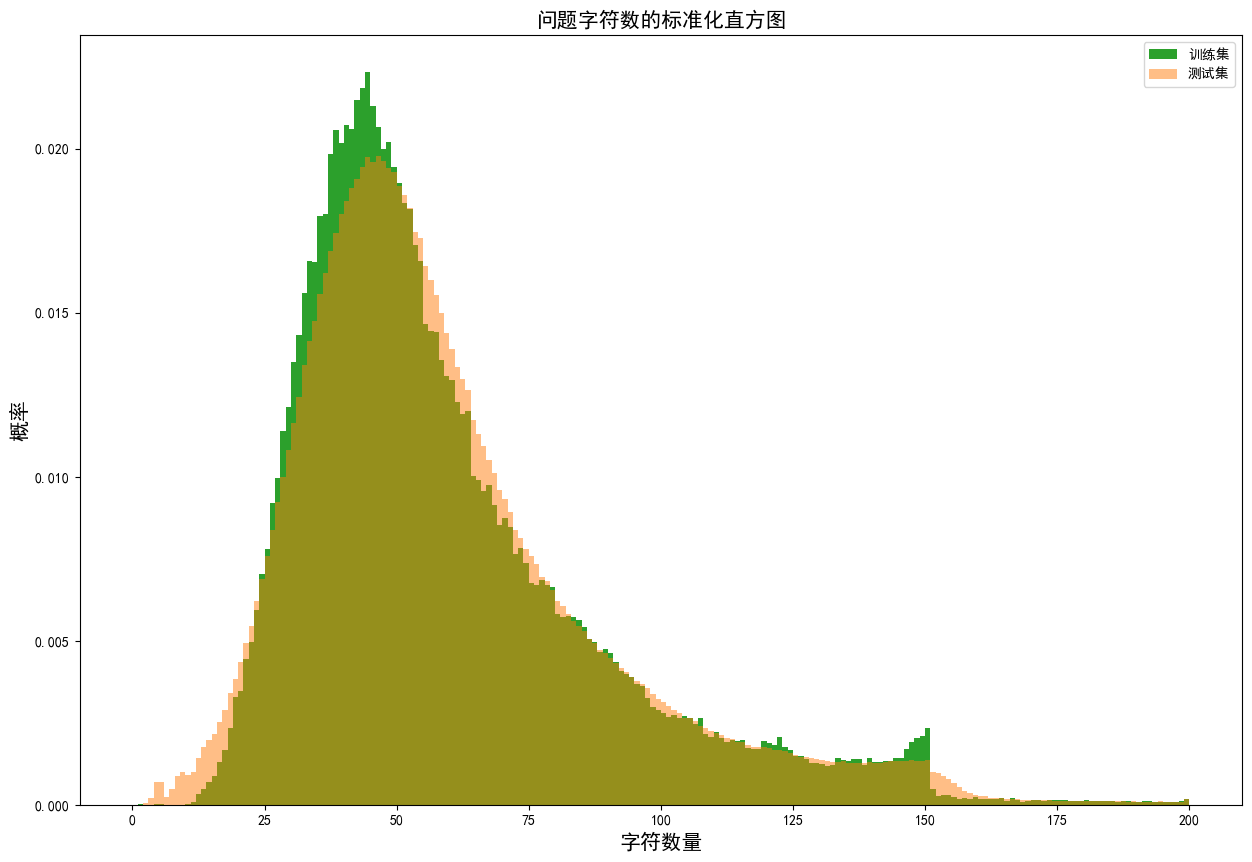

In [10]:
# 创建一个包含训练集中所有问题的序列
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
# 创建一个包含测试集中所有问题的序列
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

# 计算训练集中每个问题的字符数
dist_train = train_qs.apply(len)
# 计算测试集中每个问题的字符数
dist_test = test_qs.apply(len)
# 设置图表大小并绘制直方图
plt.figure(figsize=(15, 10))
# 绘制训练集问题字符数的直方图
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], density=True, label='训练集')
# 绘制测试集问题字符数的直方图
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], density=True, alpha=0.5, label='测试集')
# 设置图表标题和字体大小
plt.title('问题字符数的标准化直方图', fontsize=15)
# 显示图例
plt.legend()
# 设置x轴标签和字体大小
plt.xlabel('字符数量', fontsize=15)
# 设置y轴标签和字体大小
plt.ylabel('概率', fontsize=15)

# 打印训练集和测试集问题字符数的统计数据
print('训练集平均字符数 {:.2f} 训练集标准差 {:.2f} 测试集平均字符数 {:.2f} 测试集标准差 {:.2f} 训练集最大字符数 {:.2f} 测试集最大字符数 {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

训练集平均词数 11.06 训练集标准差 5.89 测试集平均词数 11.02 测试集标准差 5.84 训练集最大词数 237.00 测试集最大词数 238.00


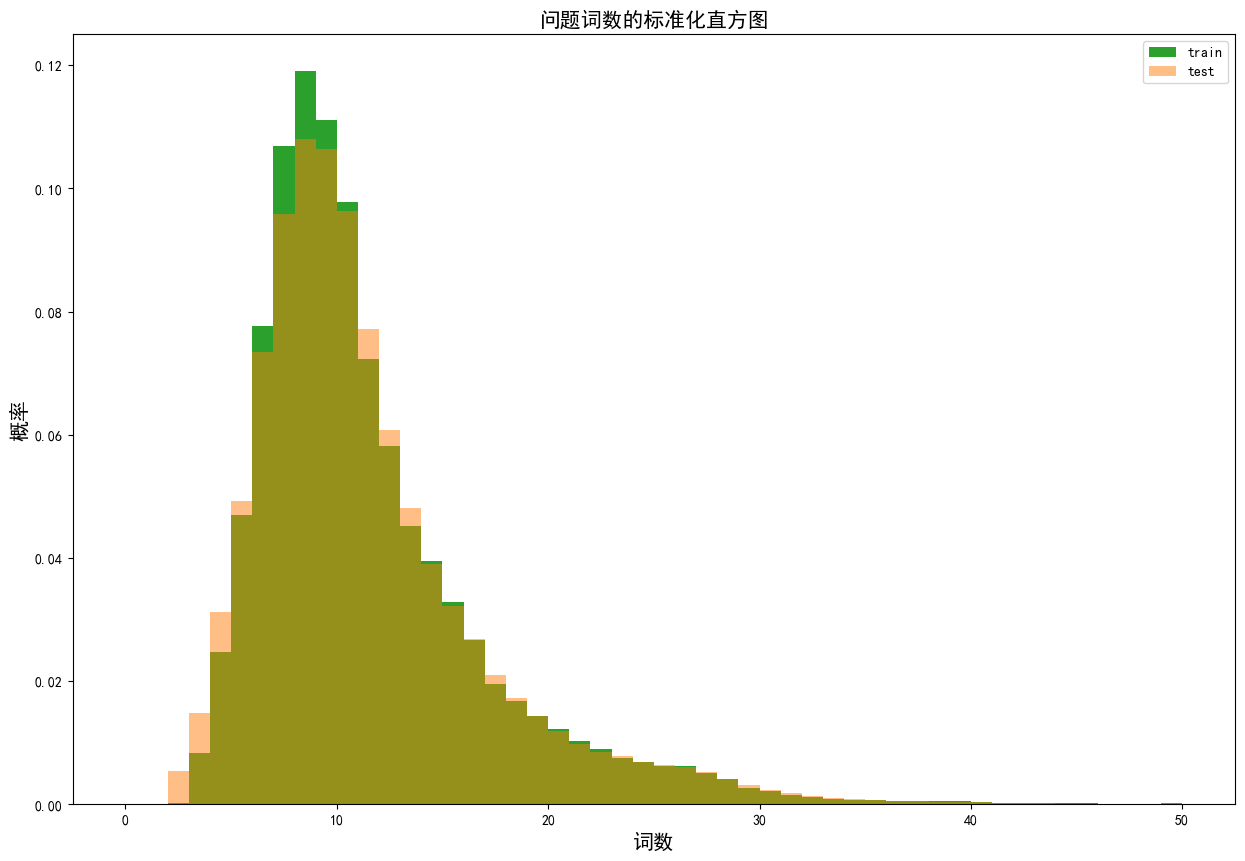

In [11]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2],density=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], density=True, alpha=0.5, label='test')
plt.title('问题词数的标准化直方图', fontsize=15)
plt.legend()
plt.xlabel('词数', fontsize=15)
plt.ylabel('概率', fontsize=15)

print('训练集平均词数 {:.2f} 训练集标准差 {:.2f} 测试集平均词数 {:.2f} 测试集标准差 {:.2f} 训练集最大词数 {:.2f} 测试集最大词数 {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

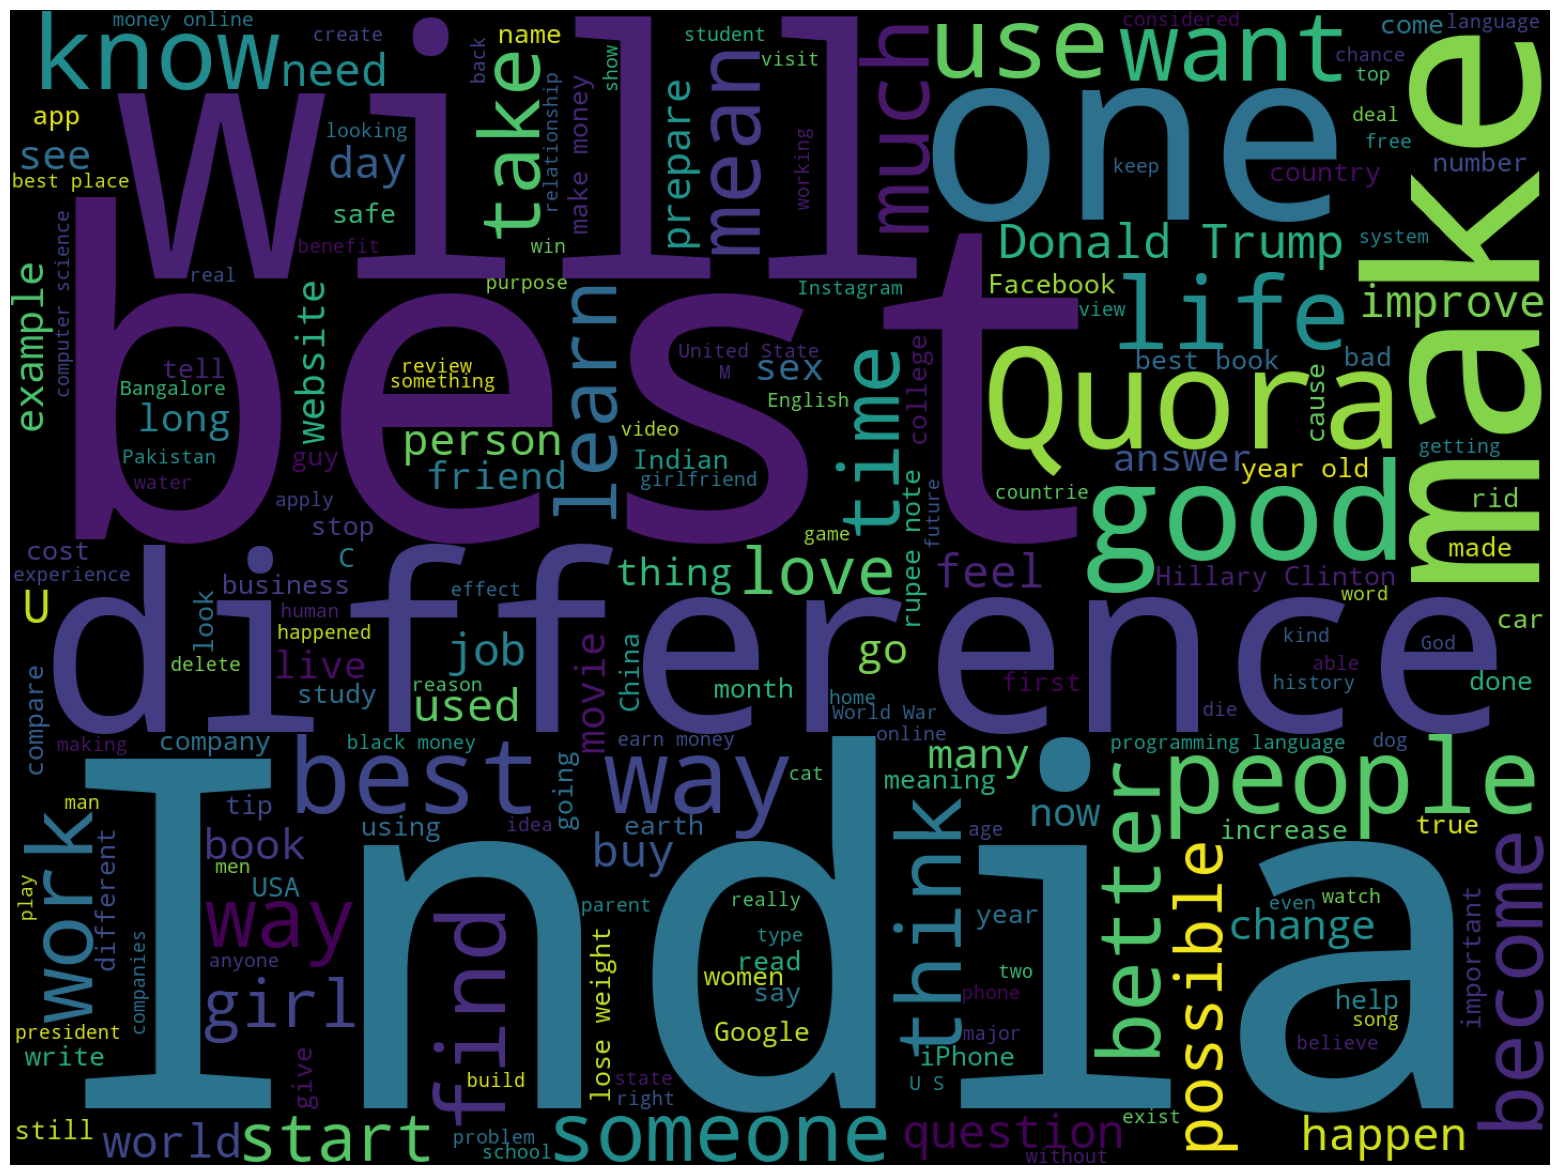

In [12]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [13]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('含有问号的问题: {:.2f}%'.format(qmarks * 100))
print('含有[math]标签的问题: {:.2f}%'.format(math * 100))
print('含有句号的问题: {:.2f}%'.format(fullstop * 100))
print('首字母大写的问题: {:.2f}%'.format(capital_first * 100))
print('含有大写字母的问题: {:.2f}%'.format(capitals * 100))
print('含有数字的问题: {:.2f}%'.format(numbers * 100))

含有问号的问题: 99.87%
含有[math]标签的问题: 0.12%
含有句号的问题: 6.31%
首字母大写的问题: 99.81%
含有大写字母的问题: 99.95%
含有数字的问题: 11.83%


In [14]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

Text(0.5, 0, '词匹配共享')

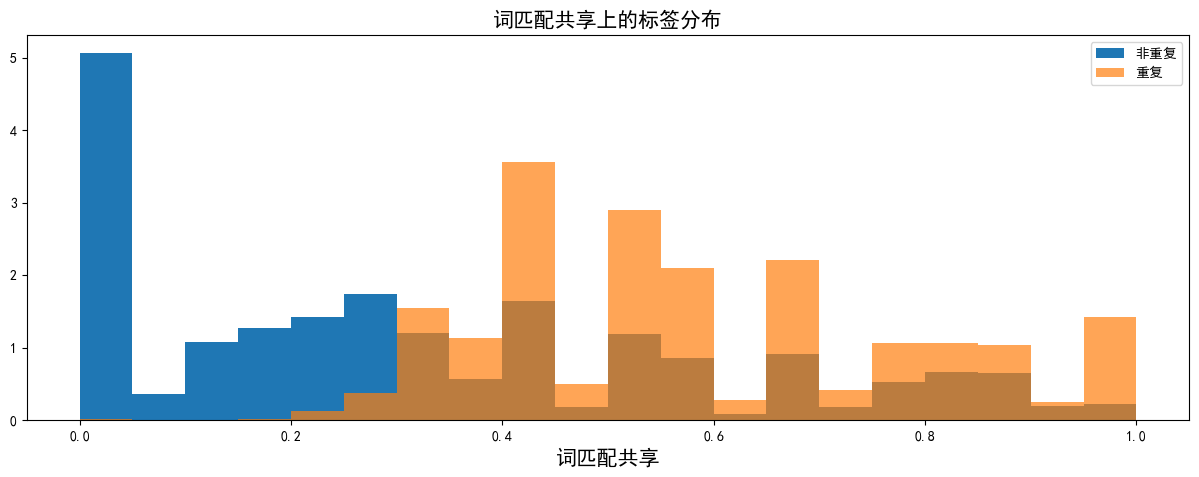

In [15]:
plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, density=True, label='非重复')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, density=True, alpha=0.7, label='重复')
plt.legend()
plt.title('词匹配共享上的标签分布', fontsize=15)
plt.xlabel('词匹配共享', fontsize=15)

In [16]:
from collections import Counter

# 如果一个词只出现一次，我们完全忽略它（可能是个打字错误）
# Epsilon 定义了一个平滑常数，它减小了极其罕见的词的影响
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [17]:
print('最常见的单词和权重：\n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\n最不常见的单词和权重：')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

最常见的单词和权重：

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

最不常见的单词和权重：


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]

In [18]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

C:\Users\Jacky\AppData\Local\Temp\ipykernel_2504\830548937.py:17: RuntimeWarning: invalid value encountered in double_scalars
  R = np.sum(shared_weights) / np.sum(total_weights)


Text(0.5, 0, '词匹配分享')

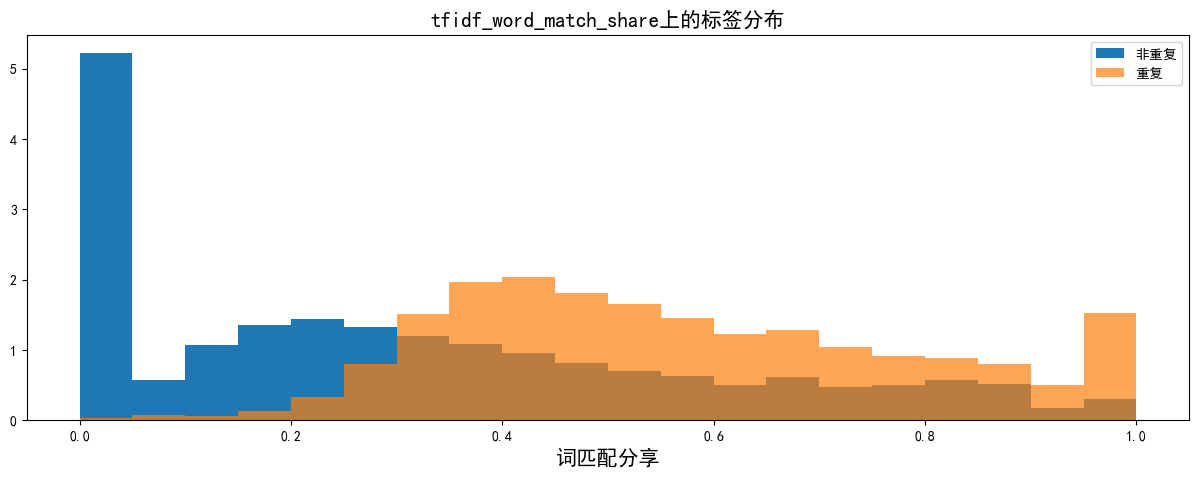

In [19]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1)
# 绘制不重复和重复标签的tfidf_word_match_share分布直方图
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, density=True, label='非重复')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, density=True, alpha=0.7, label='重复')
plt.legend()
plt.title('tfidf_word_match_share上的标签分布', fontsize=15)
plt.xlabel('词匹配分享', fontsize=15)

In [20]:
from sklearn.metrics import roc_auc_score
print('原始 AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

原始 AUC: 0.7804327049353577
TFIDF AUC: 0.7704802292218704


In [21]:
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1)

y_train = df_train['is_duplicate'].values

C:\Users\Jacky\AppData\Local\Temp\ipykernel_2504\830548937.py:17: RuntimeWarning: invalid value encountered in double_scalars
  R = np.sum(shared_weights) / np.sum(total_weights)
C:\Users\Jacky\AppData\Local\Temp\ipykernel_2504\830548937.py:17: RuntimeWarning: invalid value encountered in long_scalars
  R = np.sum(shared_weights) / np.sum(total_weights)


In [22]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# 现在我们对负类进行过采样
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

In [24]:
import xgboost as xgb

# 超参数设定
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.48704	valid-logloss:0.49111


D:\conda\envs\tf2.x\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[10]	train-logloss:0.45770	valid-logloss:0.46128
[20]	train-logloss:0.43629	valid-logloss:0.43953
[30]	train-logloss:0.42024	valid-logloss:0.42324
[40]	train-logloss:0.40805	valid-logloss:0.41086
[50]	train-logloss:0.39866	valid-logloss:0.40132
[60]	train-logloss:0.39138	valid-logloss:0.39392
[70]	train-logloss:0.38569	valid-logloss:0.38815
[80]	train-logloss:0.38119	valid-logloss:0.38359
[90]	train-logloss:0.37767	valid-logloss:0.38001
[100]	train-logloss:0.37487	valid-logloss:0.37716
[110]	train-logloss:0.37264	valid-logloss:0.37489
[120]	train-logloss:0.37087	valid-logloss:0.37309
[130]	train-logloss:0.36944	valid-logloss:0.37164
[140]	train-logloss:0.36830	valid-logloss:0.37049
[150]	train-logloss:0.36736	valid-logloss:0.36954
[160]	train-logloss:0.36661	valid-logloss:0.36877
[170]	train-logloss:0.36598	valid-logloss:0.36814
[180]	train-logloss:0.36547	valid-logloss:0.36762
[190]	train-logloss:0.36505	valid-logloss:0.36720
[200]	train-logloss:0.36470	valid-logloss:0.36685
[210]	tra

In [26]:
# 使用xgboost库的DMatrix数据结构来存储测试数据
d_test = xgb.DMatrix(x_test)

# 使用训练好的模型bst来对测试数据进行预测
p_test = bst.predict(d_test)

# 创建一个空的DataFrame来存储预测结果
sub = pd.DataFrame()

# 将测试数据集中的'test_id'列添加到sub DataFrame中
sub['test_id'] = df_test['test_id']

# 将预测结果p_test添加到sub DataFrame中的'is_duplicate'列
sub['is_duplicate'] = p_test

# 将DataFrame sub保存到CSV文件中，不包含索引
sub.to_csv('simple_xgb.csv', index=False)